# Importing Packages

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Importing Datafiles

## 'Basics' File

In [250]:
basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
basics_df.head()
basics_df.info()
basics_df.shape

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


(146144, 6)

## 'Budgets Datafile

In [251]:
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budgets_df.head()
budgets_df.info()
budgets_df.shape

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


(5782, 6)

## 'Ratings' Datafile

In [252]:
ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
ratings_df.head()
ratings_df.info()
ratings_df.shape

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(73856, 3)

# Data Preparation

## Preparing 'Basics'
        
        - Drop extraneous columns
        - Fill missing runtime entries with median runtime
        - Drop missing genre rows

In [253]:
basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [254]:
basics_df.drop(columns='original_title', inplace=True)

In [255]:
runtime_median = basics_df['runtime_minutes'].median()

basics_df = basics_df.fillna(value={'runtime_minutes': runtime_median})
basics_df

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [256]:
basics_df = basics_df.dropna()

In [257]:
basics_df.isna().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

## Preparing 'Budgets'

    - Remove special characters from budget, domestic, and worldwide gross columns
    - Change above columns datatype to int
    - Drop unnecessary columns
    - Remove rows with zeroes in domestic and worldwide gross

In [258]:
budgets_df = budgets_df.replace(r'[$,]', '', regex=True)
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec 31 2018,Red 11,7000,0,0
5778,79,Apr 2 1999,Following,6000,48482,240495
5779,80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep 29 2015,A Plague So Pleasant,1400,0,0


In [259]:
budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']] = budgets_df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(pd.to_numeric)
           
budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [260]:
budgets_df = budgets_df.drop(['id', 'release_date'], axis=1)
budgets_df

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5777,Red 11,7000,0,0
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338
5780,A Plague So Pleasant,1400,0,0


In [261]:
budgets_df = budgets_df.drop(budgets_df.loc[(budgets_df['domestic_gross']==0) & 
                                            (budgets_df['worldwide_gross']==0)].index)
budgets_df

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5775,Cavite,7000,70071,71644
5776,The Mongol King,7000,900,900
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338


In [262]:
budgets_df.isna().sum()
budgets_df.isnull().sum()

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## 'Ratings' Datafile
    
    -Check for NaN and null, dtype
    -Merge with basics

In [263]:
ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
ratings_df.head()
ratings_df.info()
ratings_df.shape

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


(73856, 3)

In [264]:
ratings_df.isna().sum()
ratings_df.isnull().sum()
ratings_df.dtypes

tconst           0
averagerating    0
numvotes         0
dtype: int64

tconst           0
averagerating    0
numvotes         0
dtype: int64

tconst            object
averagerating    float64
numvotes           int64
dtype: object

## Creating merged DF 'basics_ratings'

In [265]:
basics_ratings_df =  ratings_df.merge(basics_df, how='inner', on='tconst')
basics_ratings_df

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
73047,tt9805820,8.1,25,Caisa,2018,84.0,Documentary
73048,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,2018,120.0,"Action,Animation,Sci-Fi"
73049,tt9851050,4.7,14,Sisters,2019,87.0,"Action,Drama"
73050,tt9886934,7.0,5,The Projectionist,2019,81.0,Documentary


## Creating merged DF 'budgets_basics'

    -Requires column name change before merge
    -Change primary_title to movie in basics df
    -Merge on 'movie'

In [266]:
basics_df.rename(columns={'primary_title': 'movie'}, inplace=True)
basics_df

C:\Users\mcn92\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,tconst,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146138,tt9916428,The Secret of China,2019,87.0,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,2013,87.0,Comedy


In [267]:
basic_budgets_df = basics_df.merge(budgets_df, how='inner', on='movie')
basic_budgets_df

,tconst,movie,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",45000000,0,73706
1,tt0293429,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy",20000000,70433227,122133227
2,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",25000000,720828,9313302
3,tt2404548,On the Road,2011,90.0,Drama,25000000,720828,9313302
4,tt3872966,On the Road,2013,87.0,Documentary,25000000,720828,9313302
...,...,...,...,...,...,...,...,...
3357,tt9678962,Fuel,2018,87.0,"Documentary,Sport",2500000,174255,174255
3358,tt9729206,Diner,2019,87.0,Crime,5000000,12592907,12592907
3359,tt9805168,Traitor,2015,110.0,"Action,Drama,Romance",22000000,23530831,27882226
3360,tt9844102,Ray,2018,111.0,Crime,40000000,75305995,124823094


# Analysis

## Does a film's budget affect its gross revenue?

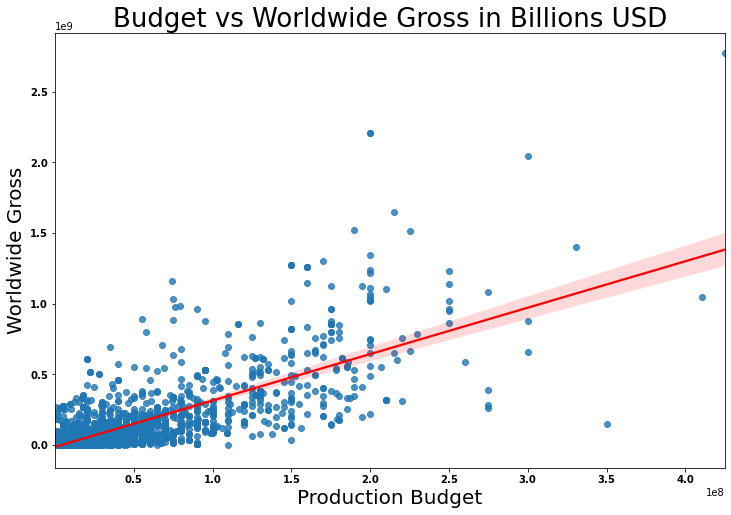

In [268]:
# Generate scatterplot of production_budget vs worldwide_gross. We use worldwide
# because it already takes domestic gross into account

plt.figure(figsize=(12,8))
ax = sns.regplot(x='production_budget', y='worldwide_gross',data=basic_budgets_df, line_kws={'color':'red'})

plt.title('Budget vs. Gross')
ax.set_xlabel('Production Budget', fontsize= 20)
ax.set_ylabel('Worldwide Gross', fontsize= 20)
ax.set_title('Budget vs Worldwide Gross in Billions USD', fontsize=26)
plt.xticks(weight='bold')
plt.yticks(weight='bold');

In [269]:
# Calculate correlation coefficient to support trend in visualization
np.corrcoef(basic_budgets_df['production_budget'], basic_budgets_df['worldwide_gross'])

array([[1.       , 0.7602276],
       [0.7602276, 1.       ]])

## Does profitability vary by genre?

    - Create profit column
    - Calculate and create profitability column
    - Split multi-value genres into single genres and groupby
    - Create plot of genre vs profitability

In [270]:
basic_budgets_df['profit'] = basic_budgets_df['worldwide_gross'] - basic_budgets_df['production_budget']
basic_budgets_df

,tconst,movie,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,profit
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",45000000,0,73706,-44926294
1,tt0293429,Mortal Kombat,2021,87.0,"Action,Adventure,Fantasy",20000000,70433227,122133227,102133227
2,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",25000000,720828,9313302,-15686698
3,tt2404548,On the Road,2011,90.0,Drama,25000000,720828,9313302,-15686698
4,tt3872966,On the Road,2013,87.0,Documentary,25000000,720828,9313302,-15686698
...,...,...,...,...,...,...,...,...,...
3357,tt9678962,Fuel,2018,87.0,"Documentary,Sport",2500000,174255,174255,-2325745
3358,tt9729206,Diner,2019,87.0,Crime,5000000,12592907,12592907,7592907
3359,tt9805168,Traitor,2015,110.0,"Action,Drama,Romance",22000000,23530831,27882226,5882226
3360,tt9844102,Ray,2018,111.0,Crime,40000000,75305995,124823094,84823094


In [271]:
basic_budgets_df.dropna(axis=1, inplace=True)

In [288]:
basic_budgets_df['profitability'] = ((basic_budgets_df['profit']) / (basic_budgets_df['worldwide_gross'])) * 100
basic_budgets_df['profitability']= basic_budgets_df['profitability'].astype(int)
basic_budgets_df.sort_values(['profitability'], ascending=False).head()

,tconst,movie,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,profit,profitability
3307,tt9691476,Snow White and the Seven Dwarfs,2016,87.0,"Comedy,Drama,Fantasy",1488000,184925486,184925486,183437486,99
3306,tt7821084,Snow White and the Seven Dwarfs,2017,49.0,"Animation,Family",1488000,184925486,184925486,183437486,99
2286,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",100000,22764410,41656474,41556474,99
1026,tt1502407,Halloween,2018,106.0,"Horror,Thriller",325000,47000000,70000000,69675000,99
2528,tt2668120,Bambi,2013,58.0,"Biography,Documentary",858000,102797000,268000000,267142000,99


In [289]:
genre_df = basic_budgets_df.copy()

split_genre = genre_df['genres'].str.split(',').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'split_genres'
genre_df = genre_df.drop(['genres'], axis=1).join(split_genre)

In [290]:
genre_df

,tconst,movie,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profit,profitability,split_genres
0,tt0249516,Foodfight!,2012,91.0,45000000,0,73706,-44926294,-60953,Action
0,tt0249516,Foodfight!,2012,91.0,45000000,0,73706,-44926294,-60953,Animation
0,tt0249516,Foodfight!,2012,91.0,45000000,0,73706,-44926294,-60953,Comedy
1,tt0293429,Mortal Kombat,2021,87.0,20000000,70433227,122133227,102133227,83,Action
1,tt0293429,Mortal Kombat,2021,87.0,20000000,70433227,122133227,102133227,83,Adventure
...,...,...,...,...,...,...,...,...,...,...
3359,tt9805168,Traitor,2015,110.0,22000000,23530831,27882226,5882226,21,Romance
3360,tt9844102,Ray,2018,111.0,40000000,75305995,124823094,84823094,67,Crime
3361,tt9889814,Kiss Kiss Bang Bang,2017,98.0,15000000,4235837,16829464,1829464,10,Crime
3361,tt9889814,Kiss Kiss Bang Bang,2017,98.0,15000000,4235837,16829464,1829464,10,Romance


In [291]:
genre_df = genre_df.groupby('split_genres').median()
genre_df.reset_index(inplace=True)

genre_df

,split_genres,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profit,profitability
0,Action,2014.0,107.0,40000000.0,36966978.5,84570595.0,36941717.0,48.5
1,Adventure,2014.0,104.5,80000000.0,63972960.0,176301374.5,93003841.5,59.0
2,Animation,2015.0,92.0,75000000.0,85886987.0,216562312.0,146271037.0,66.0
3,Biography,2015.0,108.0,20000000.0,15789389.0,28717667.0,9403192.0,40.0
4,Comedy,2014.0,98.0,22000000.0,28848693.0,47213095.0,20641183.0,53.0
5,Crime,2014.0,105.0,23000000.0,17057897.5,30866066.5,6443980.5,28.5
6,Documentary,2015.0,74.0,15000000.0,11935520.0,23290722.5,5391025.0,33.0
7,Drama,2014.0,102.0,15000000.0,12900983.5,23726626.0,5415296.0,33.0
8,Family,2014.0,95.0,22500000.0,34120192.0,52027776.0,29413772.5,51.5
9,Fantasy,2014.0,106.0,44000000.0,40168080.0,89309178.0,45080579.0,55.0


In [276]:
genre_df['profitability'] = ((genre_df['worldwide_gross']-genre_df['production_budget']) / (genre_df['worldwide_gross']))*100
genre_df

,split_genres,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profit,profitability
0,Action,2014.0,107.0,40000000.0,36966978.5,84570595.0,36941717.0,52.702237
1,Adventure,2014.0,104.5,80000000.0,63972960.0,176301374.5,93003841.5,54.623156
2,Animation,2015.0,92.0,75000000.0,85886987.0,216562312.0,146271037.0,65.367935
3,Biography,2015.0,108.0,20000000.0,15789389.0,28717667.0,9403192.0,30.356460
4,Comedy,2014.0,98.0,22000000.0,28848693.0,47213095.0,20641183.0,53.402758
5,Crime,2014.0,105.0,23000000.0,17057897.5,30866066.5,6443980.5,25.484512
6,Documentary,2015.0,74.0,15000000.0,11935520.0,23290722.5,5391025.0,35.596674
7,Drama,2014.0,102.0,15000000.0,12900983.5,23726626.0,5415296.0,36.779886
8,Family,2014.0,95.0,22500000.0,34120192.0,52027776.0,29413772.5,56.753869
9,Fantasy,2014.0,106.0,44000000.0,40168080.0,89309178.0,45080579.0,50.732947


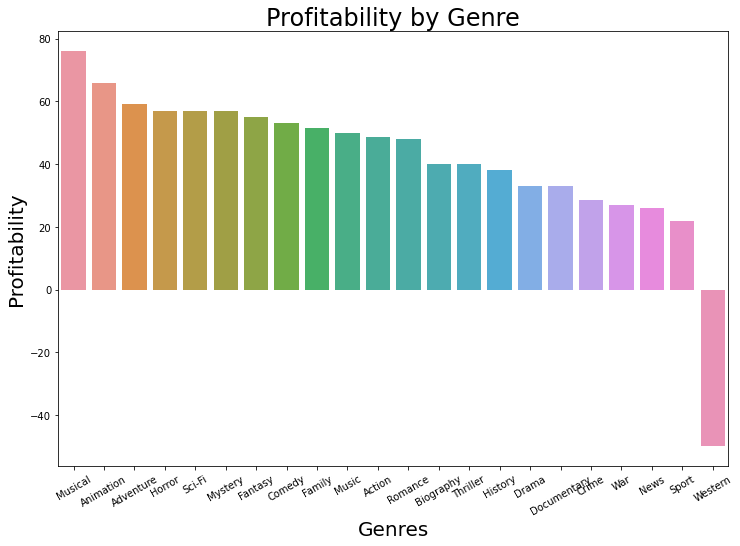

In [292]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='split_genres', y='profitability', data=genre_df, ci=None, order=genre_df.sort_values('profitability', ascending=False).split_genres)
plt.xticks(rotation=30)
plt.xlabel('Genres', fontsize=20)
plt.ylabel('Profitability', fontsize=20)
plt.title('Profitability by Genre', fontsize=24);

## Do ratings affect profitability?
 
     -Rename primary_title to movie in basics_budgets_df
     -Split genres as before, join
     -Plot ratings vs profitability

In [278]:
basics_ratings_df.rename(columns={'primary_title': 'movie'}, inplace=True)

ratings_budgets_df = basics_ratings_df.merge(budgets_df, how='inner', on='movie')

In [279]:
ratings_budgets_df

,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross
0,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",70000000,18848538,58953319
1,tt1094666,7.0,1613,The Hammer,2010,108.0,"Biography,Drama,Sport",850000,442638,442638
2,tt3096900,6.5,13,The Hammer,2015,75.0,"Action,Adventure,Documentary",850000,442638,442638
3,tt1171222,5.1,8296,Baggage Claim,2013,96.0,Comedy,8500000,21569509,22885836
4,tt1210166,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",50000000,75605492,111300835
...,...,...,...,...,...,...,...,...,...,...
2571,tt3517850,8.1,11,12 Rounds,2017,87.0,"Action,Drama,Romance",20000000,12234694,17306648
2572,tt3591950,5.5,44,Fantasia,2014,86.0,Drama,2280000,83320000,83320000
2573,tt7201846,7.5,705,Edmond,2018,110.0,"Comedy,Drama,History",10000000,131719,241719
2574,tt8043306,7.4,2724,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",1500000,0,98806


In [280]:
split_ratings = ratings_budgets_df['genres'].str.split(',').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_ratings.name = 'split_genre'
split_ratings = ratings_budgets_df.drop(['genres'], axis=1).join(split_ratings)

In [281]:
split_ratings

,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,split_genre
0,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,70000000,18848538,58953319,Action
0,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,70000000,18848538,58953319,Adventure
0,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,70000000,18848538,58953319,Fantasy
1,tt1094666,7.0,1613,The Hammer,2010,108.0,850000,442638,442638,Biography
1,tt1094666,7.0,1613,The Hammer,2010,108.0,850000,442638,442638,Drama
...,...,...,...,...,...,...,...,...,...,...
2573,tt7201846,7.5,705,Edmond,2018,110.0,10000000,131719,241719,History
2574,tt8043306,7.4,2724,Teefa in Trouble,2018,155.0,1500000,0,98806,Action
2574,tt8043306,7.4,2724,Teefa in Trouble,2018,155.0,1500000,0,98806,Comedy
2574,tt8043306,7.4,2724,Teefa in Trouble,2018,155.0,1500000,0,98806,Crime


In [282]:
split_ratings_df = split_ratings.groupby('averagerating').mean()
split_ratings_df.reset_index(inplace=True)

split_ratings_df

,averagerating,numvotes,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross
0,1.6,74978.000000,2011.000000,105.000000,1.300000e+07,7.301391e+07,9.903412e+07
1,1.7,70.000000,2013.000000,112.000000,2.500000e+07,2.359143e+07,2.986384e+07
2,1.9,4975.600000,2011.600000,87.400000,4.500000e+07,8.802518e+06,4.484674e+07
3,2.1,2585.600000,2013.600000,118.800000,1.816000e+07,1.833160e+04,1.190800e+05
4,2.3,192.000000,2011.500000,97.500000,1.250000e+07,1.133217e+08,2.633060e+08
...,...,...,...,...,...,...,...
70,8.9,13.666667,2013.333333,100.000000,1.466667e+07,9.905914e+06,1.504065e+07
71,9.0,249.375000,2012.250000,85.625000,3.700000e+07,1.566352e+07,2.840685e+07
72,9.1,28.000000,2016.000000,87.000000,9.200000e+06,2.684904e+06,4.199334e+06
73,9.2,39.666667,2014.333333,98.666667,2.016667e+07,4.316140e+07,7.269130e+07


In [283]:
split_ratings_df['production_budget'] = split_ratings_df['production_budget'].apply(np.int64)
split_ratings_df['domestic_gross'] = split_ratings_df['domestic_gross'].apply(np.int64)
split_ratings_df['worldwide_gross'] = split_ratings_df['worldwide_gross'].apply(np.int64)

In [284]:
split_ratings_df['profitability'] = ((split_ratings_df['worldwide_gross']-split_ratings_df['production_budget']) / split_ratings_df['worldwide_gross']) * 100
split_ratings_df['profitability'] = split_ratings_df['profitability'].astype(int)

In [285]:
split_ratings_df

,averagerating,numvotes,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profitability
0,1.6,74978.000000,2011.000000,105.000000,13000000,73013910,99034125,86
1,1.7,70.000000,2013.000000,112.000000,25000000,23591432,29863840,16
2,1.9,4975.600000,2011.600000,87.400000,45000000,8802518,44846742,0
3,2.1,2585.600000,2013.600000,118.800000,18160000,18331,119080,-15150
4,2.3,192.000000,2011.500000,97.500000,12500000,113321653,263306000,95
...,...,...,...,...,...,...,...,...
70,8.9,13.666667,2013.333333,100.000000,14666666,9905913,15040645,2
71,9.0,249.375000,2012.250000,85.625000,37000000,15663519,28406854,-30
72,9.1,28.000000,2016.000000,87.000000,9200000,2684904,4199334,-119
73,9.2,39.666667,2014.333333,98.666667,20166666,43161404,72691298,72


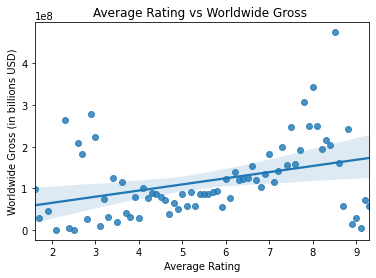

In [286]:
ax = sns.regplot(x='averagerating', y='worldwide_gross', data=split_ratings_df)
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross (in billions USD)')
plt.title('Average Rating vs Worldwide Gross ');

In [287]:
np.corrcoef(x=split_ratings_df['averagerating'], y=split_ratings_df['profitability'])

array([[1.        , 0.20458069],
       [0.20458069, 1.        ]])